# Data Preparation and Modelling

### Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import seaborn as sns
sns.set(style="dark")

### Load dataframes

In [2]:
# Read genshin_impact.csv into a dataframe
df_gi = pd.read_csv('../data/genshin_impact.csv')
df_gi = df_gi[['subreddit', 'title']]
df_gi.head()

,subreddit,title
0,Genshin_Impact,"Speed runner be like : mihoyo, we want sumeru ..."
1,Genshin_Impact,Somehow got c2 Raiden and Kujo in like 50-60 p...
2,Genshin_Impact,Go back to the big statue after main story sto...
3,Genshin_Impact,What is with this game’s story?
4,Genshin_Impact,Summer Ayaka


In [3]:
df_gi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1100 non-null   object
 1   title      1100 non-null   object
dtypes: object(2)
memory usage: 17.3+ KB


In [4]:
# Check for null values
df_gi.isnull().sum()

subreddit    0
title        0
dtype: int64

In [5]:
# Read honkaiimpact3.csv into a dataframe
df_hi = pd.read_csv('../data/honkaiimpact3.csv')
df_hi = df_hi[['subreddit', 'title']]
df_hi.head()

,subreddit,title
0,honkaiimpact3,Elf Sirin didn’t get to finish her ultimate 🙃
1,honkaiimpact3,Read this if you Want to See yandere mei or ot...
2,honkaiimpact3,What the easiest way to get money ?
3,honkaiimpact3,Should I use it for hoF? I only have (T) himeko
4,honkaiimpact3,Who should I go for?


In [6]:
df_hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1100 non-null   object
 1   title      1100 non-null   object
dtypes: object(2)
memory usage: 17.3+ KB


In [7]:
# Check for null values
df_hi.isnull().sum()

subreddit    0
title        0
dtype: int64

In [8]:
# Combine dataframes
df_full = pd.concat([df_gi, df_hi], ignore_index=True, sort=False)
df_full.head()

,subreddit,title
0,Genshin_Impact,"Speed runner be like : mihoyo, we want sumeru ..."
1,Genshin_Impact,Somehow got c2 Raiden and Kujo in like 50-60 p...
2,Genshin_Impact,Go back to the big statue after main story sto...
3,Genshin_Impact,What is with this game’s story?
4,Genshin_Impact,Summer Ayaka


In [9]:
df_full['tokens'] = ""
df_full['sentence'] = ""

tokenizer = nltk.RegexpTokenizer("\w+")

for i in range(len(df_full['title'])):
    df_full.tokens[i] = tokenizer.tokenize(df_full.title[i])
    str1 = ""
    
    for n in df_full.tokens[i]:
        str1 = str1 + " " + n
    
    df_full.sentence[i] = str1

df_full

,subreddit,title,tokens,sentence
0,Genshin_Impact,"Speed runner be like : mihoyo, we want sumeru ...","[Speed, runner, be, like, mihoyo, we, want, su...",Speed runner be like mihoyo we want sumeru now
1,Genshin_Impact,Somehow got c2 Raiden and Kujo in like 50-60 p...,"[Somehow, got, c2, Raiden, and, Kujo, in, like...",Somehow got c2 Raiden and Kujo in like 50 60 ...
2,Genshin_Impact,Go back to the big statue after main story sto...,"[Go, back, to, the, big, statue, after, main, ...",Go back to the big statue after main story st...
3,Genshin_Impact,What is with this game’s story?,"[What, is, with, this, game, s, story]",What is with this game s story
4,Genshin_Impact,Summer Ayaka,"[Summer, Ayaka]",Summer Ayaka
...,...,...,...,...
2195,honkaiimpact3,Miss Pink Fairy,"[Miss, Pink, Fairy]",Miss Pink Fairy
2196,honkaiimpact3,Pain. I blew everything i had on her. Got her ...,"[Pain, I, blew, everything, i, had, on, her, G...",Pain I blew everything i had on her Got her a...
2197,honkaiimpact3,Miss Pink Fairy,"[Miss, Pink, Fairy]",Miss Pink Fairy
2198,honkaiimpact3,Do you think i can level up from lvl 63(halfwa...,"[Do, you, think, i, can, level, up, from, lvl,...",Do you think i can level up from lvl 63 halfw...


In [10]:
# Replace 'title' with new 'word' column
df_full.drop(columns='title', inplace=True)
df_full.rename(columns={'sentence':'title'}, inplace=True)

df_full

,subreddit,tokens,title
0,Genshin_Impact,"[Speed, runner, be, like, mihoyo, we, want, su...",Speed runner be like mihoyo we want sumeru now
1,Genshin_Impact,"[Somehow, got, c2, Raiden, and, Kujo, in, like...",Somehow got c2 Raiden and Kujo in like 50 60 ...
2,Genshin_Impact,"[Go, back, to, the, big, statue, after, main, ...",Go back to the big statue after main story st...
3,Genshin_Impact,"[What, is, with, this, game, s, story]",What is with this game s story
4,Genshin_Impact,"[Summer, Ayaka]",Summer Ayaka
...,...,...,...
2195,honkaiimpact3,"[Miss, Pink, Fairy]",Miss Pink Fairy
2196,honkaiimpact3,"[Pain, I, blew, everything, i, had, on, her, G...",Pain I blew everything i had on her Got her a...
2197,honkaiimpact3,"[Miss, Pink, Fairy]",Miss Pink Fairy
2198,honkaiimpact3,"[Do, you, think, i, can, level, up, from, lvl,...",Do you think i can level up from lvl 63 halfw...


In [11]:
df_full['subreddit'] = df_full['subreddit'].map({'Genshin_Impact': 0, 'honkaiimpact3': 1})
df_full.head()

,subreddit,tokens,title
0,0,"[Speed, runner, be, like, mihoyo, we, want, su...",Speed runner be like mihoyo we want sumeru now
1,0,"[Somehow, got, c2, Raiden, and, Kujo, in, like...",Somehow got c2 Raiden and Kujo in like 50 60 ...
2,0,"[Go, back, to, the, big, statue, after, main, ...",Go back to the big statue after main story st...
3,0,"[What, is, with, this, game, s, story]",What is with this game s story
4,0,"[Summer, Ayaka]",Summer Ayaka


### Modelling

In [12]:
# Identify the X & y features
X = df_full['title']
y = df_full['subreddit']

In [13]:
X.shape

(2200,)

In [14]:
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [15]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=10)

#### First Pipeline (CountVectorizer & RandomForestClassifer)

In [16]:
# Instantiate CountVectorizer & RandomForestClassifier pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(n_estimators=1000))
])

cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.7372727272727273

In [17]:
# Fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('rf', RandomForestClassifier(n_estimators=1000))])

In [18]:
# Training score
pipe.score(X_train, y_train)

0.99

In [19]:
# Test score
pipe.score(X_test, y_test)

0.7818181818181819

In [20]:
# Instantiate pipe parameters
pipe_params = {
    'cvec__max_features': [100_000_000]
}

In [21]:
# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,
                  n_jobs = -1, 
                  param_grid=pipe_params, 
                  cv=5) 


In [22]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('rf',
                                        RandomForestClassifier(n_estimators=1000))]),
             n_jobs=-1, param_grid={'cvec__max_features': [100000000]})

In [23]:
# What's the best score?
print(gs.best_score_)

0.7436363636363637


In [24]:
# Score model on training set
gs.score(X_train, y_train)

0.99

In [25]:
# Score model on testing set.
gs.score(X_test, y_test)

0.7772727272727272

In [26]:
# Get predictions
preds = gs.predict(X_test)
prob = gs.predict_proba(X_test)
print(preds)
print(prob)

[0 1 1 ... 1 1 1]
[[0.81569057 0.18430943]
 [0.46864874 0.53135126]
 [0.46664874 0.53335126]
 ...
 [0.46664874 0.53335126]
 [0.153      0.847     ]
 [0.04390571 0.95609429]]


In [27]:
print(accuracy_score(y_test, preds))

0.7772727272727272


In [28]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [29]:
# Print results
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 402
False Positives: 148
False Negatives: 97
True Positives: 453


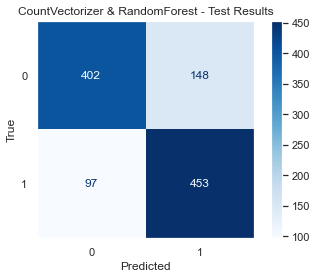

In [30]:
# View confusion matrix

plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');
plt.title("CountVectorizer & RandomForest - Test Results")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
# Calculate the specificity
spec = tn / (tn + fp)
print('Specificity:', spec)

Specificity: 0.730909090909091


In [32]:
print(preds)

[0 1 1 ... 1 1 1]


In [33]:
print(accuracy_score(y_test, preds))

0.7772727272727272


Baseline: ROC AUC=0.500
RandomForests: ROC AUC=0.867


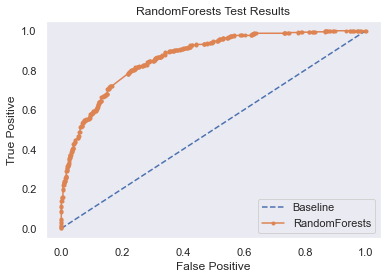

In [34]:
# ROC Curve

base_probs = [0 for _ in range(len(y_test))]
model_probs = prob[:,1]

# Calculate scores
base_auc = roc_auc_score(y_test, base_probs)
auc = roc_auc_score(y_test, model_probs)

# Summarize scores
print('Baseline: ROC AUC=%.3f' % (base_auc))
print('RandomForests: ROC AUC=%.3f' % (auc))

# Calculate roc curves
base_fpr, base_tpr, _ = roc_curve(y_test, base_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

# Plot roc curve for the model
plt.plot(base_fpr, base_tpr, linestyle='--', label='Baseline')
plt.plot(model_fpr, model_tpr, marker='.', label='RandomForests')

# Title
plt.title('RandomForests Test Results')

# Axis labels
plt.xlabel('False Positive')
plt.ylabel('True Positive')

# Legend
plt.legend()

plt.show()

#### Second Pipeline (CountVectorizer & RandomForestClassifer)

In [35]:
# Instantiate CountVectorizer & LogisticRegression pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.7790909090909091

In [36]:
# Fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

In [37]:
# Training score
pipe.score(X_train, y_train)

0.9490909090909091

In [38]:
# Test score
pipe.score(X_test, y_test)

0.8090909090909091

In [39]:
# Instantiate pipe parameters

pipe_params = {
    'cvec__max_features': [100_000_000],
}

In [40]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, 
                  n_jobs = -1, 
                  param_grid=pipe_params, 
                  cv=5) # 5-fold cross-validation.

In [41]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1, param_grid={'cvec__max_features': [100000000]})

In [42]:
# What's the best score?
print(gs.best_score_)

0.7790909090909091


In [43]:
# Score model on training set.
gs.score(X_train, y_train)

0.9490909090909091

In [44]:
# Score model on testing set.
gs.score(X_test, y_test)

0.8090909090909091

In [45]:
# Get predictions
preds = gs.predict(X_test)
prob = gs.predict_proba(X_test)
print(preds)
print(prob)

[0 0 0 ... 0 1 1]
[[0.53922175 0.46077825]
 [0.67349552 0.32650448]
 [0.5        0.5       ]
 ...
 [0.5        0.5       ]
 [0.00109943 0.99890057]
 [0.00293801 0.99706199]]


In [46]:
print(accuracy_score(y_test, preds))

0.8090909090909091


In [47]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [48]:
# Print results
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 451
False Positives: 99
False Negatives: 111
True Positives: 439


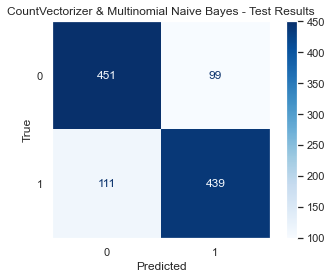

In [49]:
# View confusion matrix

plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');
plt.title("CountVectorizer & Multinomial Naive Bayes - Test Results")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.82


In [51]:
print(preds)

[0 0 0 ... 0 1 1]


In [52]:
print(accuracy_score(y_test, preds))

0.8090909090909091


Baseline: ROC AUC=0.500
MultinomialNB: ROC AUC=0.904


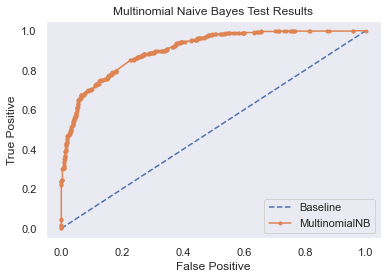

In [53]:
# ROC Curve

base_probs = [0 for _ in range(len(y_test))]
model_probs = prob[:,1]

# Calculate scores
base_auc = roc_auc_score(y_test, base_probs)
auc = roc_auc_score(y_test, model_probs)

# Summarize scores
print('Baseline: ROC AUC=%.3f' % (base_auc))
print('MultinomialNB: ROC AUC=%.3f' % (auc))

# Calculate roc curves
base_fpr, base_tpr, _ = roc_curve(y_test, base_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

# Plot roc curve for the model
plt.plot(base_fpr, base_tpr, linestyle='--', label='Baseline')
plt.plot(model_fpr, model_tpr, marker='.', label='MultinomialNB')

# Title
plt.title('Multinomial Naive Bayes Test Results')

# Axis labels
plt.xlabel('False Positive')
plt.ylabel('True Positive')

# Legend
plt.legend()

plt.show()